In [2]:
#load your data

import pandas as pd

# Load the data
file_path = '/kaggle/input/fraudcsv/Fraud.csv' #provide data path
df = pd.read_csv(file_path)


print(df.head())
print(df.info())
print(df.describe())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 co

In [3]:



print(df.dtypes)


print(df.describe())


missing_values = df.isnull().sum()
print(missing_values)





step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620

dealing with missing values and outliers:

In [ ]:

df = df.dropna()


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:

# df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(), inplace=True)
# df['newbalanceDest'].fillna(df['newbalanceDest'].mean(), inplace=True)
# df['isFraud'].fillna(df['isFraud'].mean(), inplace=True)
# df['isFlaggedFraud'].fillna(df['isFlaggedFraud'].mean(), inplace=True)


# print(df.isnull().sum())


/tmp/ipykernel_34/3207312335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(), inplace=True)
/tmp/ipykernel_34/3207312335.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


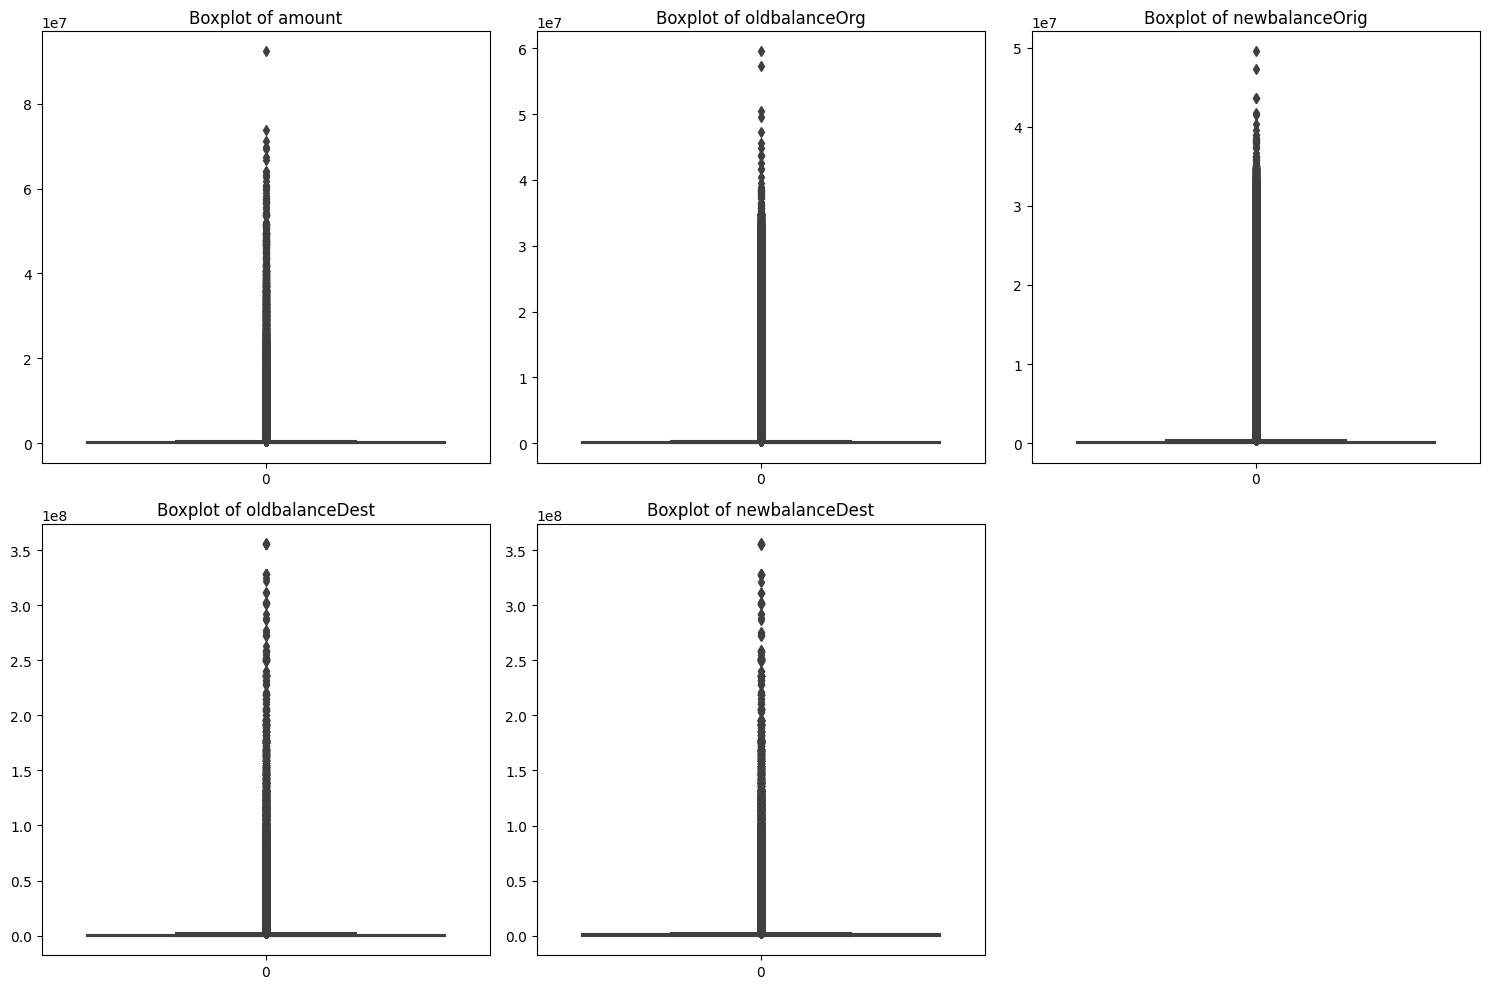

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

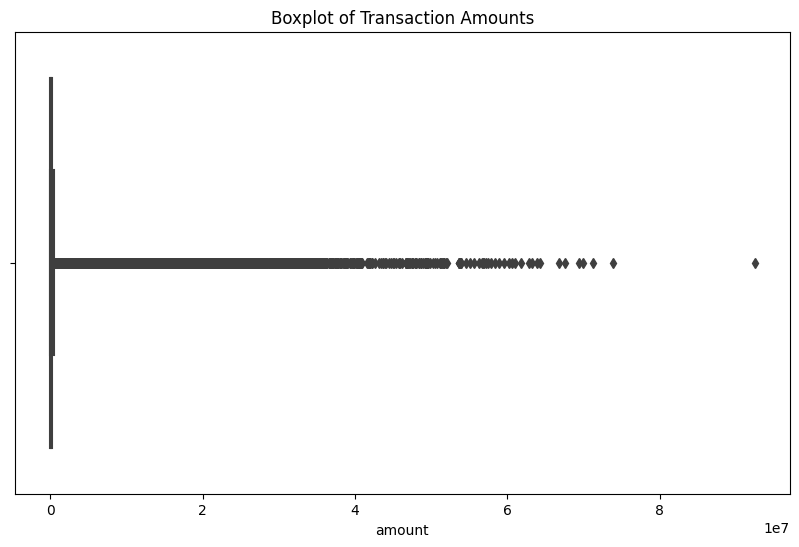

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


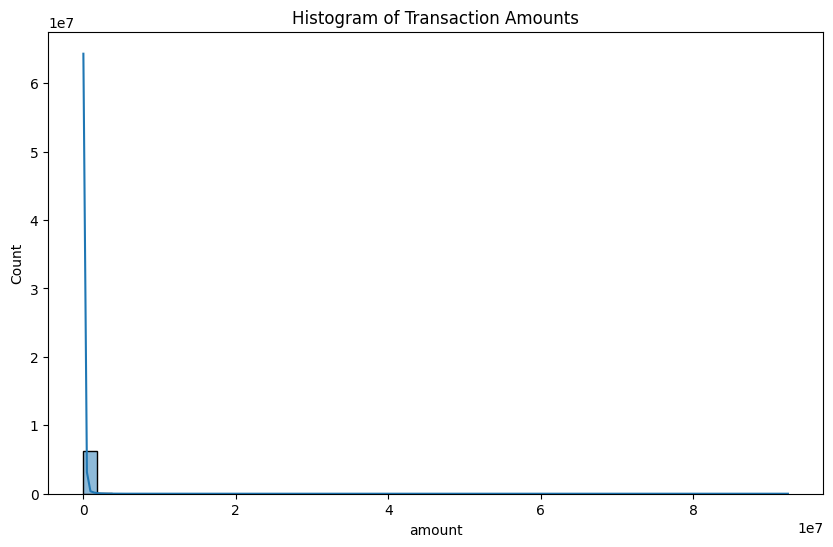

In [7]:


# Visualize the distribution of 'amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

# Visualize the distribution of 'amount' with histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.show()


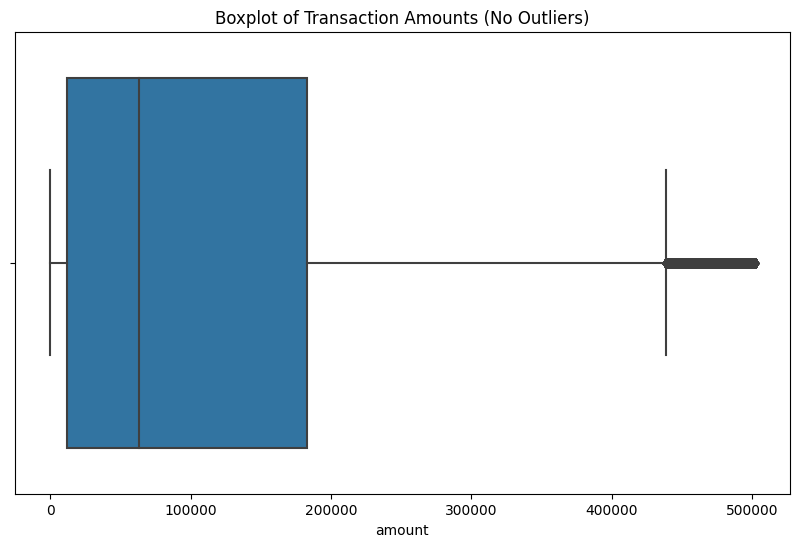

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


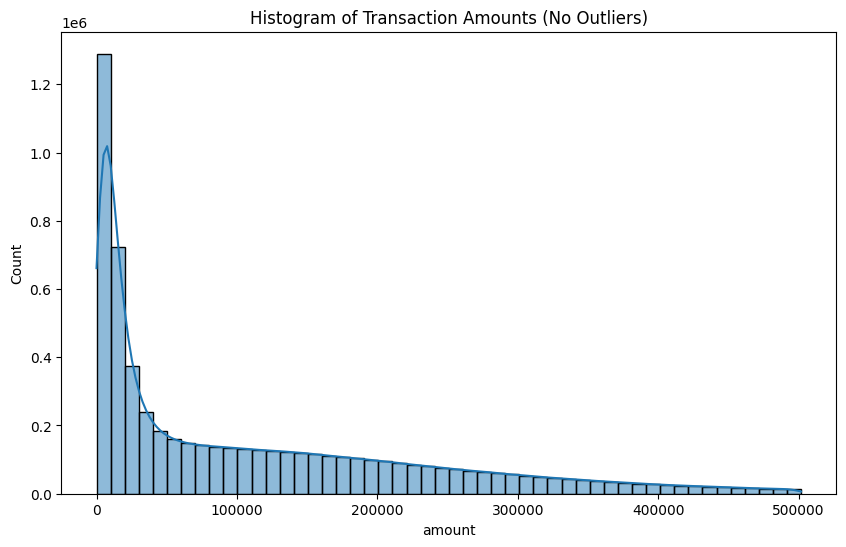

In [8]:

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]

# Visualize the distribution of 'amount' after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['amount'])
plt.title('Boxplot of Transaction Amounts (No Outliers)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts (No Outliers)')
plt.show()


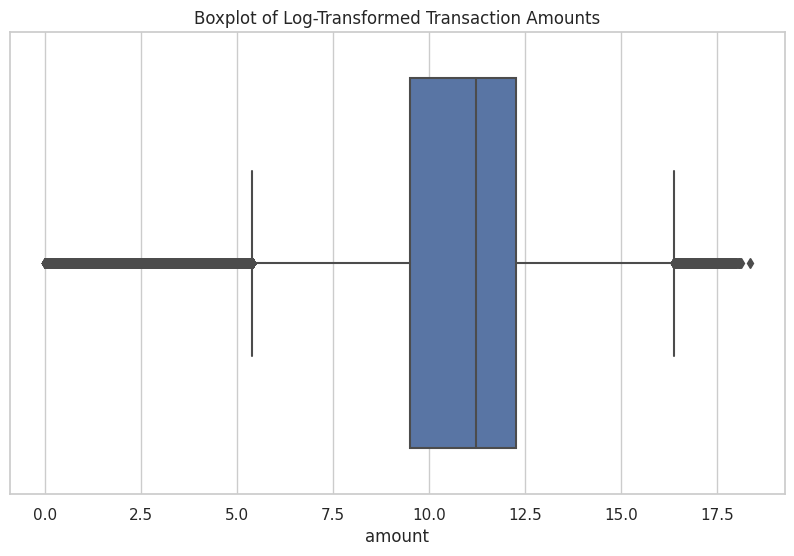

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


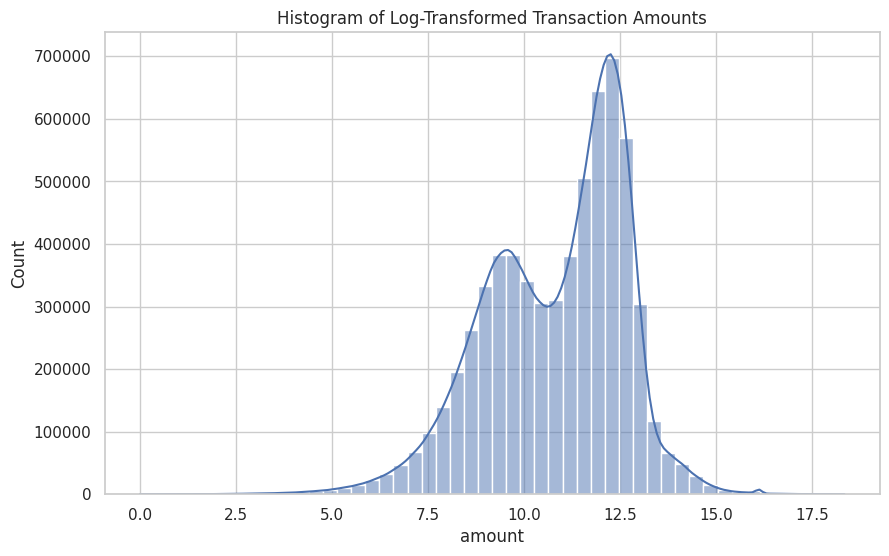

In [20]:
# Apply logarithmic transformation
import numpy as np

df['amount'] = np.log1p(df['amount'])

# Visualize the distribution of 'log_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Log-Transformed Transaction Amounts')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Histogram of Log-Transformed Transaction Amounts')
plt.show()


In [10]:
df.isnull().values.any()




False

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  log_amount      float64
dtypes: float64(6), int64(3), object(3)
memory usage: 582.5+ MB


In [12]:
summary_statistics = df.describe()
print(summary_statistics)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  \
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06   
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03   
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
25%      0.000000e+00    0.00000

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



encoding of categorical features

In [21]:

categorical_features = ['type']  


onehotencoder = OneHotEncoder()

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', onehotencoder, categorical_features)
    ])

# Transforming the dataset
df_preprocessed = preprocessor.fit_transform(df)
df_preprocessed = pd.DataFrame(df_preprocessed)

print(df_preprocessed.head())



         0         1         2         3         4         5          6   \
0 -1.703042 -0.907462 -0.229810 -0.237622 -0.323814 -0.333411  -0.035951   
1 -1.703042 -1.824023 -0.281359 -0.285812 -0.323814 -0.333411  -0.035951   
2 -1.703042 -3.106552 -0.288654 -0.292442 -0.323814 -0.333411  27.815483   
3 -1.703042 -3.106552 -0.288654 -0.292442 -0.317582 -0.333411  27.815483   
4 -1.703042 -0.813537 -0.274329 -0.282221 -0.323814 -0.333411  -0.035951   

         7         8    9    10   11   12   13  
0 -0.001586 -0.907462  0.0  0.0  0.0  1.0  0.0  
1 -0.001586 -1.824023  0.0  0.0  0.0  1.0  0.0  
2 -0.001586 -3.106552  0.0  0.0  0.0  0.0  1.0  
3 -0.001586 -3.106552  0.0  1.0  0.0  0.0  0.0  
4 -0.001586 -0.813537  0.0  0.0  0.0  1.0  0.0  


In [23]:

df_preprocessed['isFraud'] = df['isFraud'].values


X = df_preprocessed.drop('isFraud', axis=1) 
y = df_preprocessed['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [24]:
# Training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# Predicting on the test set
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Converting predictions to 0 (normal) and 1 (fraud)
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluating the model
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


[[1144454  126450]
 [    566    1054]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270904
           1       0.01      0.65      0.02      1620

    accuracy                           0.90   1272524
   macro avg       0.50      0.78      0.48   1272524
weighted avg       1.00      0.90      0.95   1272524



In [25]:
from sklearn.metrics import accuracy_score

# Confusion matrix and classification report for the training set
print("Training Set Evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")

# Confusion matrix and classification report for the testing set
print("Testing Set Evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")


Training Set Evaluation:
[[4578755  504748]
 [   2331    4262]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   5083503
           1       0.01      0.65      0.02      6593

    accuracy                           0.90   5090096
   macro avg       0.50      0.77      0.48   5090096
weighted avg       1.00      0.90      0.95   5090096

Training Accuracy: 0.900379285577325
Testing Set Evaluation:
[[1144454  126450]
 [    566    1054]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270904
           1       0.01      0.65      0.02      1620

    accuracy                           0.90   1272524
   macro avg       0.50      0.78      0.48   1272524
weighted avg       1.00      0.90      0.95   1272524

Testing Accuracy: 0.9001857725276694
